# Length

In [42]:
import os
import pandas
import numpy as np
import pandas as pd
import re
import ast
import json
from CS_feature_extractor import *
DATA_DIR = '../data'

# Experiment Config
DF_NAME = 'GSM8K'

NUM_OF_SAMPLES = 500
NUM_OF_COT = 40
MODEL = 'gpt-3.5-turbo-0125'
storage_dir = os.path.join(DATA_DIR, f'Evaluation_CoTs/Algo_Design_Data')
hard_file_path = os.path.join(storage_dir, f'{DF_NAME}_hard.json')
easy_file_path = os.path.join(storage_dir, f'{DF_NAME}_easy.json')

In [43]:
def sigmoid(x):
    return 1 / (1 + np.exp(-(x-5)))

In [44]:
with open(hard_file_path,'r') as f:
    data = json.load(f)
hard = pd.DataFrame(data)
hard['size_of_cot'] = [[(i+1)^2 for i in range(40)] for j in range(500)]
for row_idx in range(len(hard)):
    hard['SIM_COT_AGG'][row_idx][0] = 0.5
# hard['SIM_COT_AGG'] = hard['SIM_COT_AGG'].apply(lambda lst: [x*sigmoid(idx) for idx,x in enumerate(lst)])
hard

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,size_of_cot
0,0,-9867630,"[0, 9867650, 19735200, -9867630, 1973528, 1973...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.8827160493827161, 0.9006211180124224, ...","[0.5, 0.8827160493827161, 0.8963414634146342, ...","[0.0, 0.8827160493827161, 0.9207052958483164, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
1,1,3431580,"[3431580, 3431580, 3431580, 3431580, 3431580, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 4, 4, 4, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...",Challenging Math,"[0.0, 0.8947368421052632, 0.6111111111111112, ...","[0.5, 0.8947368421052632, 0.6027397260273972, ...","[0.0, 0.8947368421052632, 0.6339137645107795, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
2,2,322886700,"[14, 14, 14, 107628900, 107628900, 14, 1076289...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, ...",Challenging Math,"[0.0, 0.9117647058823529, 1.0, 0.8676470588235...","[0.5, 0.9117647058823529, 0.948905109489051, 0...","[0.0, 0.9117647058823529, 0.9558823529411764, ...","[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, ...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
3,3,-6887448,"[6887423, 6887423, 6887398, 6887398, 167, 206,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 3, 3, 4, 5, 5, 3, 3, 5, 0, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 5, 0, 5, 2, 5, 5, 2, 9, 10, 5, 9, 2,...",Challenging Math,"[0.0, 0.874251497005988, 0.6787564766839378, 1...","[0.5, 0.874251497005988, 0.7040816326530612, 0...","[0.0, 0.874251497005988, 0.707657808234442, 0....","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
4,4,21459061,"[21459067, 21459067, 16104295, 21459060, 16119...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6, 4, 1, 6, 5, 6, 5, 5, 4, 5, 1, 6, 3, 6, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.6701570680628273, 0.4605263157894737, ...","[0.5, 0.6701570680628273, 0.4595744680851064, ...","[0.0, 0.6701570680628273, 0.41422542204568025,...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,100,"[80, 40, 100, 100, 100, 100, 100, 100, 100, 10...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 2, 0, 0, 0, 0, 9, 2, 2, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.7612903225806451, 0.6611111111111111, ...","[0.5, 0.7612903225806451, 0.6451612903225806, ...","[0.0, 0.7612903225806451, 0.6762345679012345, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 1

In [45]:
with open(easy_file_path,'r') as f:
    data = json.load(f)
easy = pd.DataFrame(data)
easy['size_of_cot'] = [[i+1 for i in range(40)] for j in range(500)]
for row_idx in range(len(easy)):
    easy['SIM_COT_AGG'][row_idx][0] = 0.5
easy['SIM_COT_AGG'] = easy['SIM_COT_AGG'].apply(lambda lst: [x*sigmoid(idx) for idx,x in enumerate(lst)])
easy

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,size_of_cot
0,0,18,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 5, 0, 0, ...",Math,"[0.0, 1.0, 0.7515527950310559, 0.6987951807228...","[0.0033464254621424277, 0.01786216713476679, 0...","[0.0, 1.0, 0.7515527950310559, 0.8462650602409...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,1,3,"[3, 3, 3, 5, 3, 5, 3, 3, 3, 45353, 3, 3, 3, 3,...","[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[4, 3, 5, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, ...",Math,"[0.0, 0.7633136094674556, 0.740506329113924, 0...","[0.0033464254621424277, 0.013729118846803615, ...","[0.0, 0.7633136094674556, 0.7008087201125175, ...","[0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, ...","[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,2,70000,"[195000, 195000, 195000, 195000, 195000, 65000...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[4, 4, 4, 4, 4, 3, 8, 3, 8, 4, 3, 4, 4, 9, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 1.0, 0.8633540372670807, 0.8633540372670...","[0.0033464254621424277, 0.01798620996209156, 0...","[0.0, 1.0, 0.8633540372670807, 0.9544513457556...","[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, ...","[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,3,540,"[540, 540, 540, 540, 540, 540, 540, 540, 540, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 1.0, 1.0, 1.0, 0.9782608695652174, 1.0, ...","[0.0033464254621424277, 0.01798620996209156, 0...","[0.0, 1.0, 1.0, 1.0, 0.9782608695652174, 0.982...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,4,20,"[140, 140, 35, 3, 760, 21, 20, 10, 35, 140, 35...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 3, 3, 4, 3, 3, 4, 5, 3, 3, 3, 3, 3, 4, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.984375, 0.7913669064748201, 0.66279069...","[0.0033464254621424277, 0.01770517543143388, 0...","[0.0, 0.984375, 0.7921120246659814, 0.63736150...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,200,"[200, 200, 200, 200, 2400, 2400, 2400, 2400, 2...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...","[3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 6, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.944954128440367, 0.9166666666666666, 1...","[0.0033464254621424277, 0.017161154459243322, ...","[0.0, 0.944954128440367, 0.9256230529595015, 0...","[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3,

In [46]:
hard = pd.concat([hard,easy])
hard

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,size_of_cot
0,0,-9867630,"[0, 9867650, 19735200, -9867630, 1973528, 1973...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.8827160493827161, 0.9006211180124224, ...","[0.5, 0.8827160493827161, 0.8963414634146342, ...","[0.0, 0.8827160493827161, 0.9207052958483164, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
1,1,3431580,"[3431580, 3431580, 3431580, 3431580, 3431580, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 4, 4, 4, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...",Challenging Math,"[0.0, 0.8947368421052632, 0.6111111111111112, ...","[0.5, 0.8947368421052632, 0.6027397260273972, ...","[0.0, 0.8947368421052632, 0.6339137645107795, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
2,2,322886700,"[14, 14, 14, 107628900, 107628900, 14, 1076289...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, ...",Challenging Math,"[0.0, 0.9117647058823529, 1.0, 0.8676470588235...","[0.5, 0.9117647058823529, 0.948905109489051, 0...","[0.0, 0.9117647058823529, 0.9558823529411764, ...","[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, ...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
3,3,-6887448,"[6887423, 6887423, 6887398, 6887398, 167, 206,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 3, 3, 4, 5, 5, 3, 3, 5, 0, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 5, 0, 5, 2, 5, 5, 2, 9, 10, 5, 9, 2,...",Challenging Math,"[0.0, 0.874251497005988, 0.6787564766839378, 1...","[0.5, 0.874251497005988, 0.7040816326530612, 0...","[0.0, 0.874251497005988, 0.707657808234442, 0....","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
4,4,21459061,"[21459067, 21459067, 16104295, 21459060, 16119...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6, 4, 1, 6, 5, 6, 5, 5, 4, 5, 1, 6, 3, 6, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.6701570680628273, 0.4605263157894737, ...","[0.5, 0.6701570680628273, 0.4595744680851064, ...","[0.0, 0.6701570680628273, 0.41422542204568025,...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,200,"[200, 200, 200, 200, 2400, 2400, 2400, 2400, 2...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...","[3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 6, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.944954128440367, 0.9166666666666666, 1...","[0.0033464254621424277, 0.017161154459243322, ...","[0.0, 0.944954128440367, 0.9256230529595015, 0...","[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0

# Early stopping and SC 

In [47]:
from collections import Counter

def calculate_correctness(df):
    # Define a helper function to determine the majority and compare it with the correct answer
    def check_majority(answers, correct):
        if not answers:
            return 0
        # Count the occurrences of each answer and find the most common one
        most_common = Counter(answers).most_common(1)[0][0]
        # Compare the most common answer with the correct answer
        return 1 if most_common == str(correct) else 0

    # Apply the helper function across the DataFrame rows
    df['SC_correctness'] = df.apply(lambda row: check_majority(row['CoT answers'], row['correct answer']), axis=1)
    return df

hard = calculate_correctness(hard)

In [48]:
hard.SC_correctness.value_counts()

SC_correctness
1    634
0    366
Name: count, dtype: int64

In [49]:
easy = calculate_correctness(easy)
easy.SC_correctness.value_counts()

SC_correctness
1    402
0     98
Name: count, dtype: int64

In [50]:
import pandas as pd

def evaluate_answers_with_window(df, window_size):
    # Helper function to evaluate answers with a sliding window
    def evaluate_window(answers, correct):
        # Track the number of steps (checks) taken
        steps = window_size-1
        
        # If the list is shorter than the window size, adjust the window size to the length of the list
        window_size_adjusted = min(window_size, len(answers))
        
        # Slide through the list with the adjusted window size
        for i in range(len(answers) - window_size_adjusted + 1):
            # Check the window content
            window = answers[i:i + window_size_adjusted]
            steps += 1
            
            # If all elements in the window are the same, evaluate correctness
            if window.count(window[0]) == window_size_adjusted:
                return 1 if window[0] == str(correct) else 0, steps
        
        # If no unanimous window is found, use the same value as SC_correctness and set steps to the length of the list
        majority = Counter(answers).most_common(1)[0][0]
        correctness = 1 if majority == str(correct) else 0
        return correctness, len(answers)

    # Apply the function to each row in the DataFrame
    result = df.apply(lambda row: evaluate_window(row['CoT answers'], row['correct answer']), axis=1)
    df['ES_correctness'] = result.apply(lambda x: x[0])
    df['ES_steps'] = result.apply(lambda x: x[1])

    return df

easy = evaluate_answers_with_window(easy,5)

In [51]:
easy.ES_correctness.value_counts()

ES_correctness
1    401
0     99
Name: count, dtype: int64

In [52]:
easy.ES_steps.mean()

13.15

In [53]:

hard = evaluate_answers_with_window(hard,5)
hard.ES_correctness.value_counts()

ES_correctness
1    634
0    366
Name: count, dtype: int64

In [54]:
hard.ES_steps.mean()

17.234

In [55]:
feature_li = [
 # 'LEN',
 'QUA_IM',
 'DIF_IV',
 # 'DIF_SUB',
 # 'SIM_COT_BIGRAM',
 'SIM_COT_AGG',
 # 'SIM_COT_PW',
 'SIM_AC_BIGRAM',
 'SIM_AC_AGG',
 'SIM_AC_PW',
    'size_of_cot'

 
  ]

# Visualize

In [56]:
import pandas as pd

def concatenate_columns(df,data_columns, outcome_column):
    # Initialize an empty dictionary to store the concatenated data
    concatenated_data = {}
    
    # Get the number of rows based on the length of the outcome column
    num_rows = len(df)
    
    # Iterate over each column
    for column in data_columns+[outcome_column]:
        # Initialize an empty list to store the concatenated values for the current column
        concatenated_values = []
        
        # Iterate over each row
        for i in range(num_rows):
            # Get the list of values for the current column and row
            
            values = df[column].iloc[i]
            
            # Concatenate the values into a single string
            concatenated_values += list(values)
            
        
        # Add the concatenated values to the dictionary with the column name as the key
        concatenated_data[column] = concatenated_values
        print(len(concatenated_values))
    # Add the outcome column to the concatenated data dictionary
    
    # Create a DataFrame from the concatenated data dictionary
    hard_final = pd.DataFrame(concatenated_data)
    
    return hard_final

hard_final = concatenate_columns(hard,feature_li,'Correctness')
easy_final = concatenate_columns(easy,feature_li,'Correctness')

40000
40000
40000
40000
40000
40000
40000
40000
20000
20000
20000
20000
20000
20000
20000
20000


In [57]:
hard_final['cot_answer'] = np.repeat(hard['correct answer'].values,40)

In [58]:
easy_final['cot_answer'] = np.repeat(easy['correct answer'].values,40)

In [59]:
from collections import Counter
print('--------------EASY--------------')
for col in easy_final.columns:
    if not col.startswith('SIM_COT_'):
        print(col, ':', Counter(easy_final[col]))
print('--------------HARD--------------')
for col in hard_final.columns:
    if not col.startswith('SIM_COT_'):
        print(col, ':', Counter(hard_final[col]))

--------------EASY--------------
QUA_IM : Counter({0: 19961, 1: 39})
DIF_IV : Counter({0: 18375, 2: 1127, 5: 279, 10: 124, 9: 83, 1: 7, 11: 3, 3: 1, 6: 1})
SIM_AC_BIGRAM : Counter({1: 14051, 0: 5949})
SIM_AC_AGG : Counter({1: 15238, 0: 4762})
SIM_AC_PW : Counter({1: 13897, 0: 6103})
size_of_cot : Counter({1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500, 10: 500, 11: 500, 12: 500, 13: 500, 14: 500, 15: 500, 16: 500, 17: 500, 18: 500, 19: 500, 20: 500, 21: 500, 22: 500, 23: 500, 24: 500, 25: 500, 26: 500, 27: 500, 28: 500, 29: 500, 30: 500, 31: 500, 32: 500, 33: 500, 34: 500, 35: 500, 36: 500, 37: 500, 38: 500, 39: 500, 40: 500})
Correctness : Counter({1: 14452, 0: 5548})
cot_answer : Counter({6: 720, 20: 640, 5: 600, 4: 600, 15: 520, 10: 480, 3: 440, 8: 440, 2: 440, 16: 400, 50: 360, 18: 320, 9: 320, 40: 320, 21: 320, 45: 280, 25: 280, 30: 280, 12: 280, 60: 240, 14: 240, 80: 240, 48: 240, 7: 200, 26: 200, 70: 200, 75: 200, 36: 200, 32: 200, 1: 200, 17: 160, 100: 1

# CS based performance

In [60]:
def log_reg(features):
    coe = [-0.1, -5 , -1  , 3 , 2]
    lincomb = sum([coe[i]*features[i] for i in range(len(coe))]) -1.5
    return 1 / (1 + np.exp(-lincomb))
log_reg([5,0,0,1,1])

0.9525741268224334

In [61]:
hard_final

,QUA_IM,DIF_IV,SIM_COT_AGG,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,size_of_cot,Correctness,cot_answer
0,0,2,0.500000,0,0,0,3,0,-9867630
1,0,0,0.882716,0,0,0,0,0,-9867630
2,0,0,0.896341,0,0,0,1,0,-9867630
3,0,0,0.660633,0,0,0,6,1,-9867630
4,0,0,0.713004,0,0,0,7,0,-9867630
...,...,...,...,...,...,...,...,...,...
39995,0,0,0.672489,1,1,1,36,1,10
39996,0,0,0.709957,1,1,1,37,1,10
39997,0,0,0.683983,1,1,1,38,1,10
39998,0,0,0.679654,1,1,1,39,1,10


In [62]:
df = hard
df_concate = hard_final
threshold = 0.36
warm_up_steps = 0

In [65]:
X = df_concate[feature_li]
y = df_concate['Correctness']

In [67]:
# Initialize and fit the logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X , y)

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test data (predicting probabilities)
y_probs = model.predict_proba(X)[:, 1]  # Get probabilities for the positive class

Coefficients: [[-2.75681195 -0.23055382  0.00531978  0.89721533  0.72967873  1.82878575
  -0.01930017]]
Intercept: [-1.17745337]


In [68]:
# My methods
# Calculate the ROC curve
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss, precision_recall_curve, auc,roc_curve, confusion_matrix, classification_report, f1_score

fpr, tpr, thresholds = roc_curve(y, y_probs)
auc_score = roc_auc_score(y, y_probs)
print(f'AUROC Score: {auc_score}')

# Finding the best cutoff value
f1_scores = [f1_score(y, y_probs > thresh) for thresh in thresholds]
lr_easy_best_thresh = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {lr_easy_best_thresh}')

AUROC Score: 0.8545477826524455
Best Threshold: 0.4978026165031488


In [157]:
y_probs_yq = df_concate[feature_li].apply(log_reg,axis =1)

/var/folders/bm/2x1k2y0s2bv2xxbw4jxfs_hh0000gn/T/ipykernel_27010/3792410629.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lincomb = sum([coe[i]*features[i] for i in range(len(coe))]) -1.5


In [159]:
y_probs_yq = df_concate[feature_li].apply(log_reg,axis =1)

fpr, tpr, thresholds = roc_curve(y, y_probs_yq)
auc_score = roc_auc_score(y, y_probs_yq)
print(f'AUROC Score: {auc_score}')

# Finding the best cutoff value
f1_scores = [f1_score(y, y_probs_yq > thresh) for thresh in thresholds]
lr_easy_best_thresh = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {lr_easy_best_thresh}')

/var/folders/bm/2x1k2y0s2bv2xxbw4jxfs_hh0000gn/T/ipykernel_27010/3792410629.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lincomb = sum([coe[i]*features[i] for i in range(len(coe))]) -1.5


AUROC Score: 0.7644582488057832
Best Threshold: 0.18012687702748068


In [69]:
threshold = lr_easy_best_thresh

In [75]:
# df_concate['confidence_score']= cls_model.predict_proba(df_concate[feature_li])[:,1]
# df_concate['confidence_score']=df_concate[feature_li].apply(log_reg,axis =1)
# lists = [df_concate['confidence_score'].iloc[i:i+40].tolist() for i in range(0, len(df_concate), 40)]
# df['confidence_score'] = lists

df_concate['confidence_score']=y_probs
lists = [df_concate['confidence_score'].iloc[i:i+40].tolist() for i in range(0, len(df_concate), 40)]
df['confidence_score'] = lists

df_concate['confidence_score_yq']=df_concate[feature_li].apply(log_reg,axis =1)
lists = [df_concate['confidence_score_yq'].iloc[i:i+40].tolist() for i in range(0, len(df_concate), 40)]
df['confidence_score_yq'] = lists

/var/folders/bm/2x1k2y0s2bv2xxbw4jxfs_hh0000gn/T/ipykernel_27010/3792410629.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lincomb = sum([coe[i]*features[i] for i in range(len(coe))]) -1.5


In [71]:
def normalize_cs(cs_li, threshold):
    cs_arr = np.array(cs_li)
    # normalized_cs = [(cs-threshold)/(1-threshold) if cs > threshold else (cs-threshold)/(threshold) for cs in cs_arr]
    normalized_cs = cs_arr-threshold
    # normalized_cs = [0.5 if cs > threshold else -0.5 for cs in cs_arr]
    return np.array(normalized_cs)
def stop_con1(individual_cs):
    cumulative_difference = (individual_cs[warm_up_steps:]).cumsum()
    stop_idx = np.argmax(cumulative_difference > 0.5)
    return stop_idx
def stop_con2(individual_cs):
    buffer = []
    for idx,cs in enumerate(individual_cs):
        if cs>0:
            buffer.append(idx)
        if len(buffer) == 3:
            return buffer[-1]

In [161]:
def process_scores_yq(df, threshold, confidence_score_col):
    CS_Answer = []
    CS_correctness = []
    CS_steps = []
    warm_up_steps = 0

    for idx, row in df.iterrows():
        individual_cs = [normalize_cs(score, threshold) for score in row[confidence_score_col][warm_up_steps:]]
        stop_idx = stop_con2(individual_cs)
        num_of_steps = warm_up_steps + stop_idx if stop_idx else 40
        answers = row['CoT answers'][:num_of_steps]
        scores = individual_cs[:num_of_steps]
        weighted_votes = Counter()
        
        for answer, score in zip(answers, scores):
            if score > 0:
                weighted_votes[answer] += score
        # Account for no valid weighted votes
        if not weighted_votes:
            for answer, score in zip(answers, scores):
                weighted_votes[answer] += score

        result = max(weighted_votes, key=weighted_votes.get)
        CS_Answer.append(result)
        CS_correctness.append(1 if result == str(row['correct answer']) else 0)
        CS_steps.append(num_of_steps)

    df['CS_Answer'] = CS_Answer
    df['CS_correctness'] = CS_correctness
    df['CS_steps'] = CS_steps

    # Print additional details
    print(df['CS_steps'].mean())
    print(df['CS_correctness'].value_counts())
    print(df['CS_correctness'].sum() / len(df))

    return df

updated_df = process_scores_yq(df, threshold=0.5, confidence_score_col='confidence_score')
print(updated_df.ES_steps.mean(),updated_df.CS_steps.mean())
print()
print(updated_df.ES_correctness.value_counts(),updated_df.CS_correctness.value_counts())
print()
print(updated_df.ES_correctness.sum()/len(updated_df),updated_df.CS_correctness.sum()/len(updated_df))

11.93
CS_correctness
1    625
0    375
Name: count, dtype: int64
0.625
17.234 11.93

ES_correctness
1    634
0    366
Name: count, dtype: int64 CS_correctness
1    625
0    375
Name: count, dtype: int64

0.634 0.625


In [162]:
updated_df = process_scores_yq(df, threshold=0.5, confidence_score_col='confidence_score_yq')
print(updated_df.ES_steps.mean(),updated_df.CS_steps.mean())
print()
print(updated_df.ES_correctness.value_counts(),updated_df.CS_correctness.value_counts())
print()
print(updated_df.ES_correctness.sum()/len(updated_df),updated_df.CS_correctness.sum()/len(updated_df))

10.175
CS_correctness
1    631
0    369
Name: count, dtype: int64
0.631
17.234 10.175

ES_correctness
1    634
0    366
Name: count, dtype: int64 CS_correctness
1    631
0    369
Name: count, dtype: int64

0.634 0.631


In [108]:
import pandas as pd
from collections import Counter

def consecutive_scores_above_threshold(scores, answers, threshold, n):
    for i in range(len(scores) - n + 1):
        # Check if all the next 'n' scores are above the threshold
        if all(score > threshold for score in scores[i:i+n]):
            # Check if all answers in this range are the same
            if len(set(answers[i:i+n])) == 1:
                return True, i + n , answers[i]
    return False, len(scores), None  # If no consecutive scores found or answers differ

def process_scores_gy(df, threshold, confidence_score_col, n):
    CS_Answer = []
    CS_correctness = []
    CS_steps = []
    found_count = 0
    for idx, row in df.iterrows():
        confidence_scores = row[confidence_score_col]
        answers = row['CoT answers']
        found, num_of_steps, answer = consecutive_scores_above_threshold(confidence_scores, answers, threshold, n)
        if found:
            found_count += 1
            CS_Answer.append(answer)
            CS_correctness.append(1 if answer == str(row['correct answer']) else 0)
            CS_steps.append(num_of_steps)  # +1 to account for the 0-indexing
        else:
            CS_Answer.append(None)
            CS_correctness.append(row['SC_correctness'])
            CS_steps.append(num_of_steps)
    df['CS_Answer'] = CS_Answer
    df['CS_correctness'] = CS_correctness
    df['CS_steps'] = CS_steps

    print(df['CS_steps'].mean())
    print(df['CS_correctness'].value_counts())
    print(df['CS_correctness'].sum() / len(df))
    return df


updated_df = process_scores_gy(df, threshold=lr_easy_best_thresh, confidence_score_col='confidence_score_yq', n=2)


11.628
CS_correctness
1    630
0    370
Name: count, dtype: int64
0.63


/var/folders/bm/2x1k2y0s2bv2xxbw4jxfs_hh0000gn/T/ipykernel_27010/4058028271.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  col_cmaps = {col: get_cmap('viridis')(i / len(confidence_score_cols)) for i, col in enumerate(confidence_score_cols)}


5.067
CS_correctness
1    619
0    381
Name: count, dtype: int64
0.619
10.426
CS_correctness
1    638
0    362
Name: count, dtype: int64
0.638
14.914
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
10.537
CS_correctness
1    629
0    371
Name: count, dtype: int64
0.629
16.483
CS_correctness
1    633
0    367
Name: count, dtype: int64
0.633
20.764
CS_correctness
1    633
0    367
Name: count, dtype: int64
0.633
10.258
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
14.296
CS_correctness
1    635
0    365
Name: count, dtype: int64
0.635
17.144
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
10.571
CS_correctness
1    629
0    371
Name: count, dtype: int64
0.629
16.584
CS_correctness
1    633
0    367
Name: count, dtype: int64
0.633
20.773
CS_correctness
1    633
0    367
Name: count, dtype: int64
0.633
13.717
CS_correctness
1    633
0    367
Name: count, dtype: int64
0.633
16.655
CS_correctness
1    635
0    365
Name: count, dtype: int64

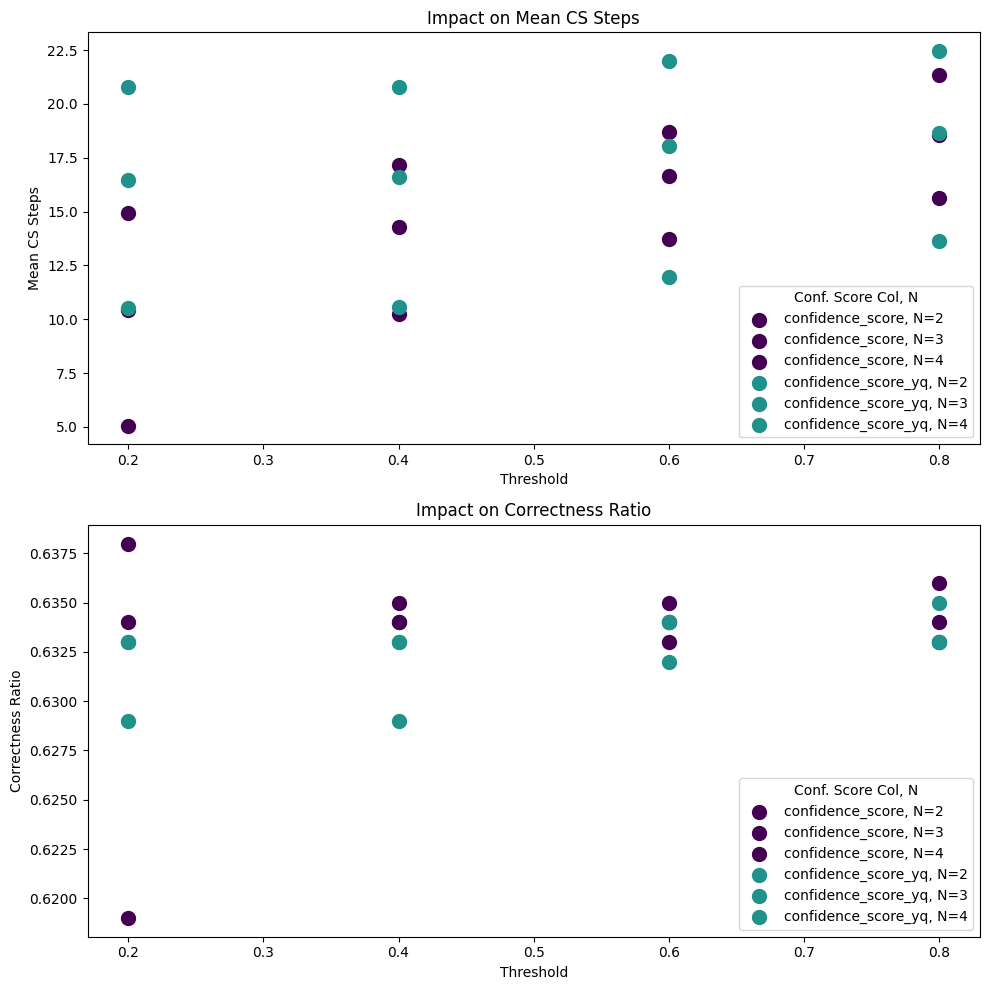

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from matplotlib.cm import get_cmap

def plot_impact_of_parameters(df, thresholds, confidence_score_cols, n_values):
    results = []
    # Define two colormaps, one for each unique confidence score column
    col_cmaps = {col: get_cmap('viridis')(i / len(confidence_score_cols)) for i, col in enumerate(confidence_score_cols)}
    # Define color dict for 'n' values within each column color
    color_dict = {(col, n): col_cmaps[col] for col in confidence_score_cols for n in n_values}

    # Iterate over all combinations of threshold, confidence_score_col, and n
    for threshold, col, n in product(thresholds, confidence_score_cols, n_values):
        temp_df = df.copy()
        updated_df = process_scores_gy(temp_df, threshold, col, n)
        mean_steps = updated_df['CS_steps'].mean()
        correctness_ratio = updated_df['CS_correctness'].sum() / len(updated_df)
        
        # Store results
        results.append({
            'Threshold': threshold,
            'Confidence Score Column': col,
            'N': n,
            'Mean Steps': mean_steps,
            'Correctness Ratio': correctness_ratio,
            'Color': color_dict[(col, n)]  # Store the color associated with each column and n
        })

    # Convert results to DataFrame for easier plotting
    results_df = pd.DataFrame(results)

    # Plotting
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))

    # Scatter Plot for Mean Steps
    for (col, n), group in results_df.groupby(['Confidence Score Column', 'N']):
        ax[0].scatter(group['Threshold'], group['Mean Steps'], label=f'{col}, N={n}', color=color_dict[(col, n)], s=100)
    ax[0].set_title('Impact on Mean CS Steps')
    ax[0].set_xlabel('Threshold')
    ax[0].set_ylabel('Mean CS Steps')
    ax[0].legend(title='Conf. Score Col, N')

    # Scatter Plot for Correctness Ratio
    for (col, n), group in results_df.groupby(['Confidence Score Column', 'N']):
        ax[1].scatter(group['Threshold'], group['Correctness Ratio'], label=f'{col}, N={n}', color=color_dict[(col, n)], s=100)
    ax[1].set_title('Impact on Correctness Ratio')
    ax[1].set_xlabel('Threshold')
    ax[1].set_ylabel('Correctness Ratio')
    ax[1].legend(title='Conf. Score Col, N')

    plt.tight_layout()
    plt.show()

# Example usage:
thresholds = [0.2, 0.4, 0.6, 0.8]  # Define a list of thresholds to test
confidence_score_cols = ['confidence_score', 'confidence_score_yq']  # Different confidence score columns
n_values = [2, 3, 4]  # Different values of n to test

plot_impact_of_parameters(df, thresholds, confidence_score_cols, n_values)


12.249
CS_correctness
1    633
0    367
Name: count, dtype: int64
0.633
15.626
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
18.191
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
20.656
CS_correctness
1    633
0    367
Name: count, dtype: int64
0.633
23.12
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
25.059
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
26.302
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
27.639
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
28.811
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
29.63
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
30.499
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
31.142
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
31.827
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
32.448
CS_correctness
1    634
0    366
Name: count, dtype: int64


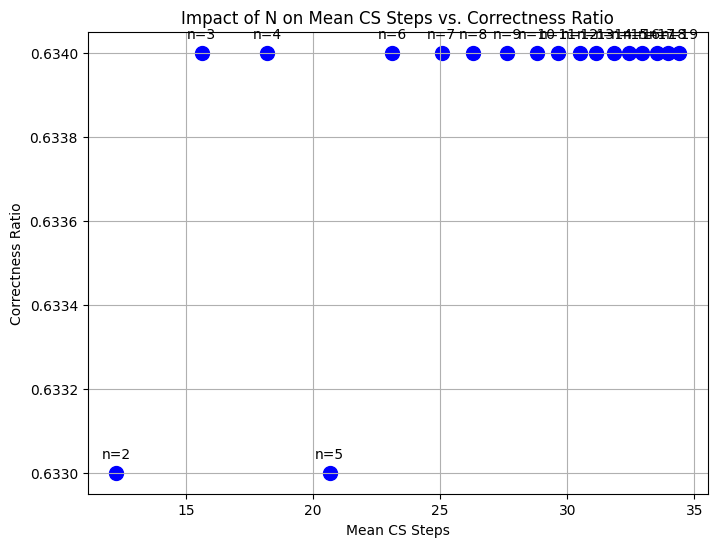

In [120]:
def plot_n_impact_on_steps_and_correctness(df, threshold=lr_easy_best_thresh, confidence_score_col='confidence_score', n_values=range(2,20)):
    # Prepare to collect results for plotting
    mean_steps = []
    correctness_ratios = []
    
    # Process data for each n value
    for n in n_values:
        temp_df = df.copy()
        updated_df = process_scores_gy(temp_df, threshold, confidence_score_col, n)
        mean_step = updated_df['CS_steps'].mean()
        correctness_ratio = updated_df['CS_correctness'].sum() / len(updated_df)

        # Store results
        mean_steps.append(mean_step)
        correctness_ratios.append(correctness_ratio)

    # Create plot
    plt.figure(figsize=(8, 6))
    plt.scatter(mean_steps, correctness_ratios, color='blue', s=100)
    for i, n in enumerate(n_values):
        plt.annotate(f'n={n}', (mean_steps[i], correctness_ratios[i]), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.title('Impact of N on Mean CS Steps vs. Correctness Ratio')
    plt.xlabel('Mean CS Steps')
    plt.ylabel('Correctness Ratio')
    plt.grid(True)
    plt.show()
plot_n_impact_on_steps_and_correctness(updated_df)

In [121]:
updated_df = process_scores_gy(df, threshold=lr_easy_best_thresh, confidence_score_col='confidence_score', n=2)

12.249
CS_correctness
1    633
0    367
Name: count, dtype: int64
0.633


In [156]:
import numpy as np

def scoring_new(df, threshold, confidence_score_col, decay_rate=0.99, confidence_target=2):
    CS_Answer = []
    CS_correctness = []
    CS_steps = []

    for idx, row in df.iterrows():
        scores = np.array(row[confidence_score_col])
        answers = np.array(row['CoT answers'])
        total_votes = {}
        cumulative_confidence = 0

        # Apply a global decay factor
        decay_factors = decay_rate ** np.arange(len(scores))[::-1]
        decayed_scores = scores * decay_factors

        for step, (score, answer) in enumerate(zip(decayed_scores, answers)):
            # Update total votes only for scores above the threshold
            if score > threshold:
                if answer in total_votes:
                    total_votes[answer] += score
                else:
                    total_votes[answer] = score

            # Update cumulative confidence
                cumulative_confidence += score

            # Early stopping condition based on cumulative confidence
            if cumulative_confidence > confidence_target:
                max_answer = max(total_votes, key=total_votes.get)
                max_score = total_votes[max_answer]
                if max_score / cumulative_confidence >= 0.7:
                    CS_Answer.append(max_answer)
                    correct = 1 if max_answer == str(row['correct answer']) else 0
                    CS_correctness.append(correct)
                    CS_steps.append(step + 1)
                    break
        else:
            # No early stop triggered
            CS_Answer.append(None)
            CS_correctness.append(0)
            CS_steps.append(len(scores))

    df['CS_Answer'] = CS_Answer
    df['CS_correctness'] = CS_correctness
    df['CS_steps'] = CS_steps

    # Print additional details
    print(df['CS_steps'].mean())
    print(df['CS_correctness'].value_counts())
    print(df['CS_correctness'].sum() / len(df))

    return df
# Example usage:
# df = pd.read_csv('your_file.csv')  # Assume DataFrame is loaded
updated_df = scoring_new(df, threshold=lr_easy_best_thresh, confidence_score_col='confidence_score')



16.599
CS_correctness
1    583
0    417
Name: count, dtype: int64
0.583


12.249
CS_correctness
1    633
0    367
Name: count, dtype: int64
0.633
15.626
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
18.191
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
20.656
CS_correctness
1    633
0    367
Name: count, dtype: int64
0.633
23.12
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
25.059
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
26.302
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
27.639
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
28.811
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
29.63
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
30.499
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
31.142
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
31.827
CS_correctness
1    634
0    366
Name: count, dtype: int64
0.634
32.448
CS_correctness
1    634
0    366
Name: count, dtype: int64


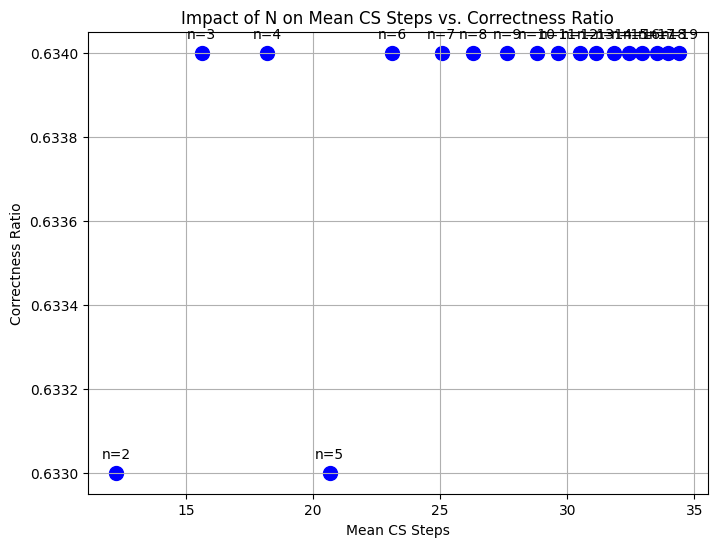

In [135]:
plot_n_impact_on_steps_and_correctness(updated_df)